In [389]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [390]:
df = pd.read_excel("Data_Train.xlsx")
df_original = df.copy()

In [391]:
df.duplicated().sum()

220

In [392]:
df = df.drop_duplicates()


In [393]:
df.duplicated().sum()

0

In [394]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [395]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [396]:
# can get from Date_of_Journey and Duration

# can use Total_Stops instead
df.drop(columns=['Route'], inplace=True)

#df.drop(columns=['Additional_Info'], inplace=True)


In [397]:
df.duplicated().sum()

0

In [398]:
df = df.drop_duplicates()


In [399]:
df.duplicated().sum()

0

In [400]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,No info,12648


In [401]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8183
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [402]:
df["Additional_Info"] = df["Additional_Info"].replace({'No Info': 'No info'})

In [403]:
def parse_arrival_time(row):
    try:
        return pd.to_datetime(row['Arrival_Time'], format='%H:%M %d %b')
    except ValueError:
        return pd.to_datetime(row['Arrival_Time'], format='%H:%M')

In [404]:
#df['Arrival_Time'] = df.apply(parse_arrival_time, axis=1)

In [405]:
# df['Arrival_Hour'] = df['Arrival_Time'].dt.hour
# df['Arrival_Minute'] = df['Arrival_Time'].dt.minute


In [406]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302


In [407]:
df.drop(columns=['Arrival_Time'], inplace=True)  # Drop the original column

In [408]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,4h 45m,1 stop,No info,13302


In [409]:
# def convert_duration(duration):
#     hours, minutes = 0, 0
#     if 'h' in duration:
#         hours = int(duration.split('h')[0].strip())
#     if 'm' in duration:
#         minutes_part = duration.split('h')[-1]
#         minutes = int(minutes_part.replace('m', '').strip()) if 'm' in minutes_part else 0
#     return hours * 60 + minutes

# df['Duration'] = df['Duration'].apply(convert_duration)

def convert_duration(duration):
    hours, minutes = 0, 0
    if 'h' in duration:
        hours = int(duration.split('h')[0].strip())
    if 'm' in duration:
        minutes = int(duration.split('h')[-1].replace('m', '').strip()) if 'm' in duration.split('h')[-1] else 0
    return hours * 60 + minutes

df['Duration'] = df['Duration'].apply(convert_duration)


In [410]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,285,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,150,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,155,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,180,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,160,non-stop,No info,12648


In [411]:
df['Price'].value_counts()

Price
10262    258
10844    212
7229     161
4804     160
4823     131
        ... 
8925       1
11774      1
16497      1
8853       1
12648      1
Name: count, Length: 1870, dtype: int64

In [412]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal on numerical features
df = remove_outliers(df, 'Price')  # Apply on target variable

In [413]:
df['Duration'].describe()

count    10369.000000
mean       628.545183
std        501.142347
min          5.000000
25%        170.000000
50%        505.000000
75%        910.000000
max       2860.000000
Name: Duration, dtype: float64

In [414]:
df['Duration'].value_counts()

Duration
170     544
90      386
165     333
175     332
155     328
       ... 
2025      1
1890      1
2135      1
2525      1
2860      1
Name: count, Length: 368, dtype: int64

In [415]:
df = remove_outliers(df, 'Duration')  

In [416]:
df['Duration'].describe()

count    10295.000000
mean       616.843613
std        483.338492
min          5.000000
25%        170.000000
50%        500.000000
75%        900.000000
max       2000.000000
Name: Duration, dtype: float64

In [417]:
df['Price'].describe()

count    10295.000000
mean      8806.632152
std       4062.438523
min       1759.000000
25%       5198.000000
50%       8067.000000
75%      12195.000000
max      23001.000000
Name: Price, dtype: float64

In [418]:
df['Price'].value_counts()

Price
10262    258
10844    212
7229     161
4804     160
4823     131
        ... 
16497      1
8853       1
14153      1
8488       1
12648      1
Name: count, Length: 1805, dtype: int64

In [419]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,285,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,150,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,155,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,180,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,160,non-stop,No info,12648


In [420]:
stop_mapping = {
    "non-stop": 0,
    "1 stop": 1,
    "2 stops": 2,
    "3 stops": 3,
    "4 stops": 4
}
df['Total_Stops'] = df['Total_Stops'].map(stop_mapping)


In [421]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,170,0.0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,445,2.0,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,1140,2.0,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,325,1.0,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,285,1.0,No info,13302
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,150,0.0,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,155,0.0,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,180,0.0,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,160,0.0,No info,12648


In [422]:
df['Dep_Time'] = df['Dep_Time'].str.strip()

In [423]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], format='%H:%M')
df['Dep_Hour'] = df['Dep_Time'].dt.hour
df['Dep_Minute'] = df['Dep_Time'].dt.minute

In [424]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,1900-01-01 22:20:00,170,0.0,No info,3897,22,20
1,Air India,1/05/2019,Kolkata,Banglore,1900-01-01 05:50:00,445,2.0,No info,7662,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,1900-01-01 09:25:00,1140,2.0,No info,13882,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,1900-01-01 18:05:00,325,1.0,No info,6218,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,1900-01-01 16:50:00,285,1.0,No info,13302,16,50
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,1900-01-01 19:55:00,150,0.0,No info,4107,19,55
10679,Air India,27/04/2019,Kolkata,Banglore,1900-01-01 20:45:00,155,0.0,No info,4145,20,45
10680,Jet Airways,27/04/2019,Banglore,Delhi,1900-01-01 08:20:00,180,0.0,No info,7229,8,20
10681,Vistara,01/03/2019,Banglore,New Delhi,1900-01-01 11:30:00,160,0.0,No info,12648,11,30


In [425]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,1900-01-01 22:20:00,170,0.0,No info,3897,22,20
1,Air India,1/05/2019,Kolkata,Banglore,1900-01-01 05:50:00,445,2.0,No info,7662,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,1900-01-01 09:25:00,1140,2.0,No info,13882,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,1900-01-01 18:05:00,325,1.0,No info,6218,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,1900-01-01 16:50:00,285,1.0,No info,13302,16,50


In [426]:
df.drop(columns=["Dep_Time"], axis = 1, inplace = True)

In [427]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,170,0.0,No info,3897,22,20
1,Air India,1/05/2019,Kolkata,Banglore,445,2.0,No info,7662,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,1140,2.0,No info,13882,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,325,1.0,No info,6218,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,285,1.0,No info,13302,16,50


In [428]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')

In [429]:
df

,Airline,Date_of_Journey,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minute
0,IndiGo,2019-03-24,Banglore,New Delhi,170,0.0,No info,3897,22,20
1,Air India,2019-05-01,Kolkata,Banglore,445,2.0,No info,7662,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,1140,2.0,No info,13882,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,325,1.0,No info,6218,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,285,1.0,No info,13302,16,50
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,150,0.0,No info,4107,19,55
10679,Air India,2019-04-27,Kolkata,Banglore,155,0.0,No info,4145,20,45
10680,Jet Airways,2019-04-27,Banglore,Delhi,180,0.0,No info,7229,8,20
10681,Vistara,2019-03-01,Banglore,New Delhi,160,0.0,No info,12648,11,30


In [430]:
df['Journey_Day'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month
df.drop(columns=['Date_of_Journey'], inplace=True) 


In [431]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minute,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,170,0.0,No info,3897,22,20,24,3
1,Air India,Kolkata,Banglore,445,2.0,No info,7662,5,50,1,5
2,Jet Airways,Delhi,Cochin,1140,2.0,No info,13882,9,25,9,6
3,IndiGo,Kolkata,Banglore,325,1.0,No info,6218,18,5,12,5
4,IndiGo,Banglore,New Delhi,285,1.0,No info,13302,16,50,1,3
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,150,0.0,No info,4107,19,55,9,4
10679,Air India,Kolkata,Banglore,155,0.0,No info,4145,20,45,27,4
10680,Jet Airways,Banglore,Delhi,180,0.0,No info,7229,8,20,27,4
10681,Vistara,Banglore,New Delhi,160,0.0,No info,12648,11,30,1,3


In [432]:
from datetime import timedelta

# Create the departure datetime
df['Departure_Datetime'] = pd.to_datetime(
    dict(year=2023, month=df['Journey_Month'], day=df['Journey_Day'], hour=df['Dep_Hour'], minute=df['Dep_Minute'])
)

# Convert Duration from minutes to timedelta
df['Duration_Timedelta'] = df['Duration'].apply(lambda x: timedelta(minutes=x))

# Calculate Arrival datetime
df['Arrival_Datetime'] = df['Departure_Datetime'] + df['Duration_Timedelta']

# Extract Arrival Day and Month
df['Arrival_Day'] = df['Arrival_Datetime'].dt.day
df['Arrival_Month'] = df['Arrival_Datetime'].dt.month

# Drop intermediate columns if not needed
df.drop(columns=['Departure_Datetime', 'Duration_Timedelta', 'Arrival_Datetime'], inplace=True)

# Preview the result
print(df[['Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_Minute', 'Duration', 'Arrival_Day', 'Arrival_Month']].head())

   Journey_Day  Journey_Month  Dep_Hour  Dep_Minute  Duration  Arrival_Day  \
0           24              3        22          20       170           25   
1            1              5         5          50       445            1   
2            9              6         9          25      1140           10   
3           12              5        18           5       325           12   
4            1              3        16          50       285            1   

   Arrival_Month  
0              3  
1              5  
2              6  
3              5  
4              3  


In [433]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minute,Journey_Day,Journey_Month,Arrival_Day,Arrival_Month
0,IndiGo,Banglore,New Delhi,170,0.0,No info,3897,22,20,24,3,25,3
1,Air India,Kolkata,Banglore,445,2.0,No info,7662,5,50,1,5,1,5
2,Jet Airways,Delhi,Cochin,1140,2.0,No info,13882,9,25,9,6,10,6
3,IndiGo,Kolkata,Banglore,325,1.0,No info,6218,18,5,12,5,12,5
4,IndiGo,Banglore,New Delhi,285,1.0,No info,13302,16,50,1,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,150,0.0,No info,4107,19,55,9,4,9,4
10679,Air India,Kolkata,Banglore,155,0.0,No info,4145,20,45,27,4,27,4
10680,Jet Airways,Banglore,Delhi,180,0.0,No info,7229,8,20,27,4,27,4
10681,Vistara,Banglore,New Delhi,160,0.0,No info,12648,11,30,1,3,1,3


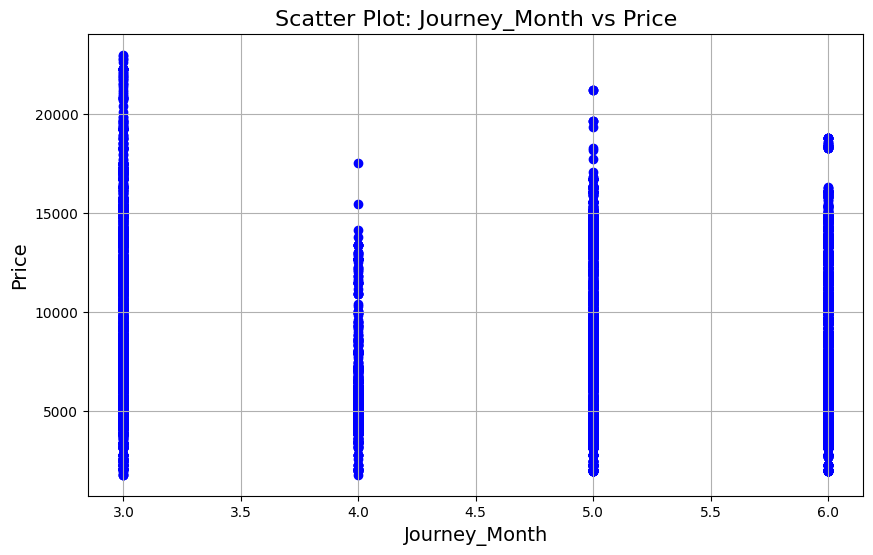

In [434]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Journey_Month'], df['Price'], alpha=1, color='blue')
plt.title("Scatter Plot: Journey_Month vs Price", fontsize=16)
plt.xlabel("Journey_Month", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.grid(True, alpha=1)
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Multiple carriers Premium economy'),
  Text(10, 0, 'Trujet')])

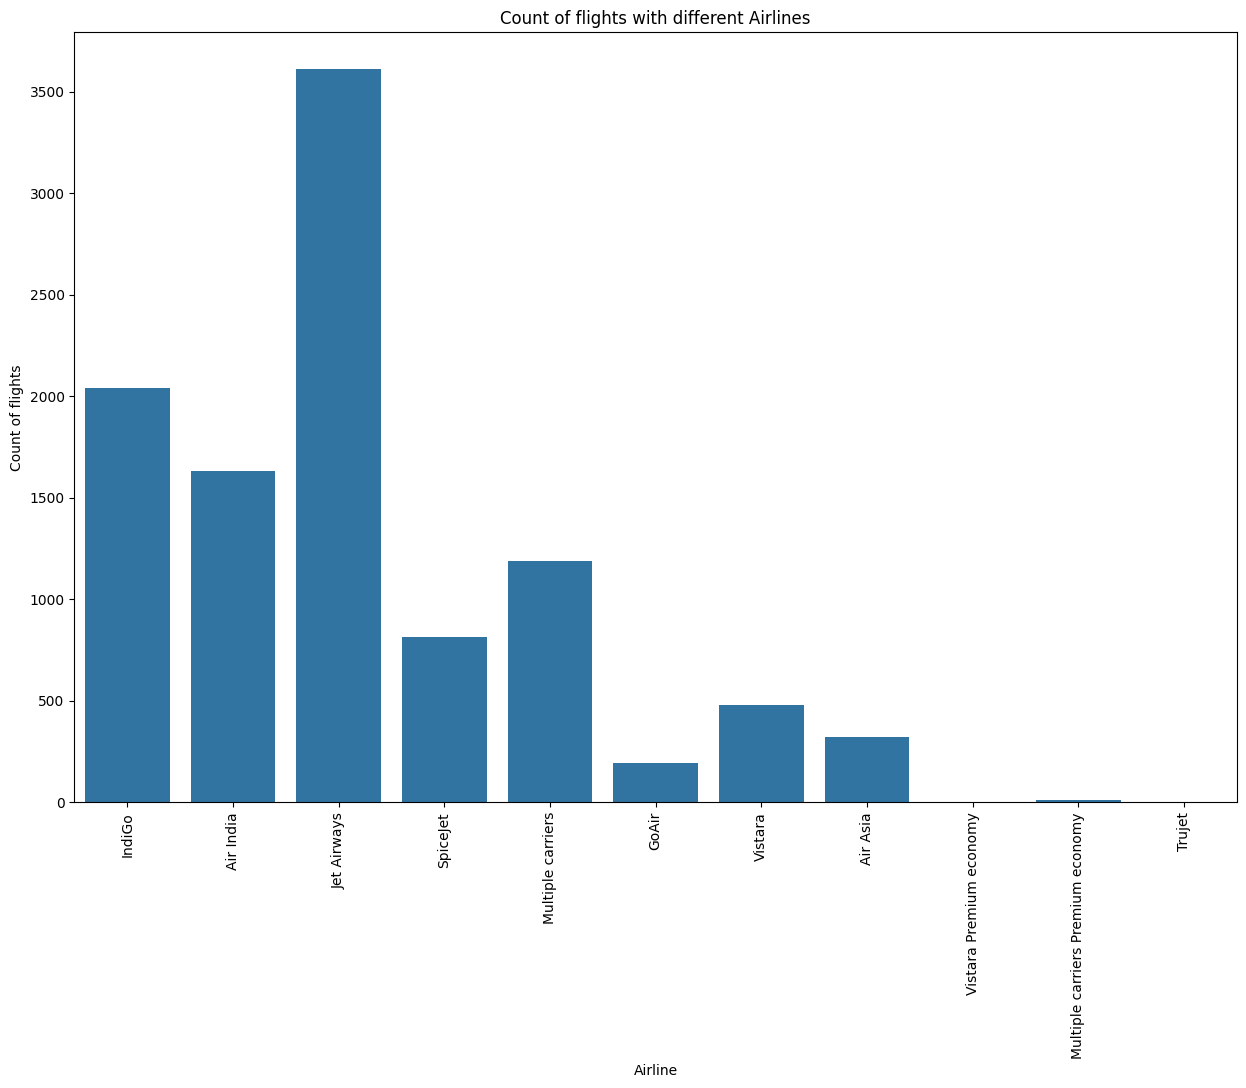

In [435]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23036\2693356594.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




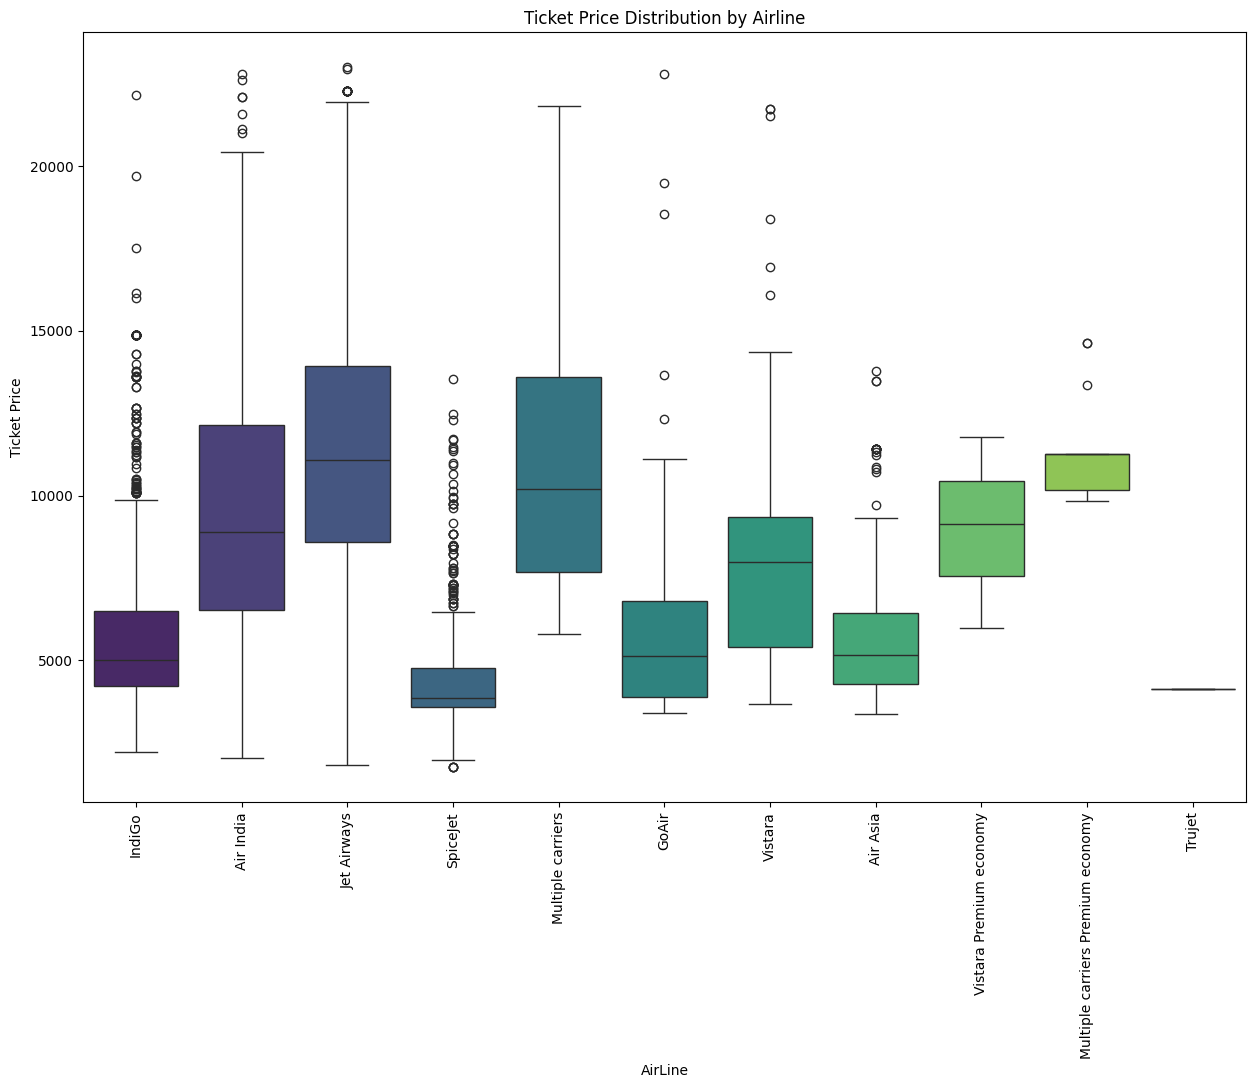

In [436]:
plt.figure(figsize=(15, 10))
sns.boxplot(
    x='Airline',
    y='Price',
    data=df,
    palette="viridis"
)
plt.title('Ticket Price Distribution by Airline')
plt.xlabel('AirLine')
plt.ylabel('Ticket Price')
plt.xticks(rotation = 90)
plt.show()

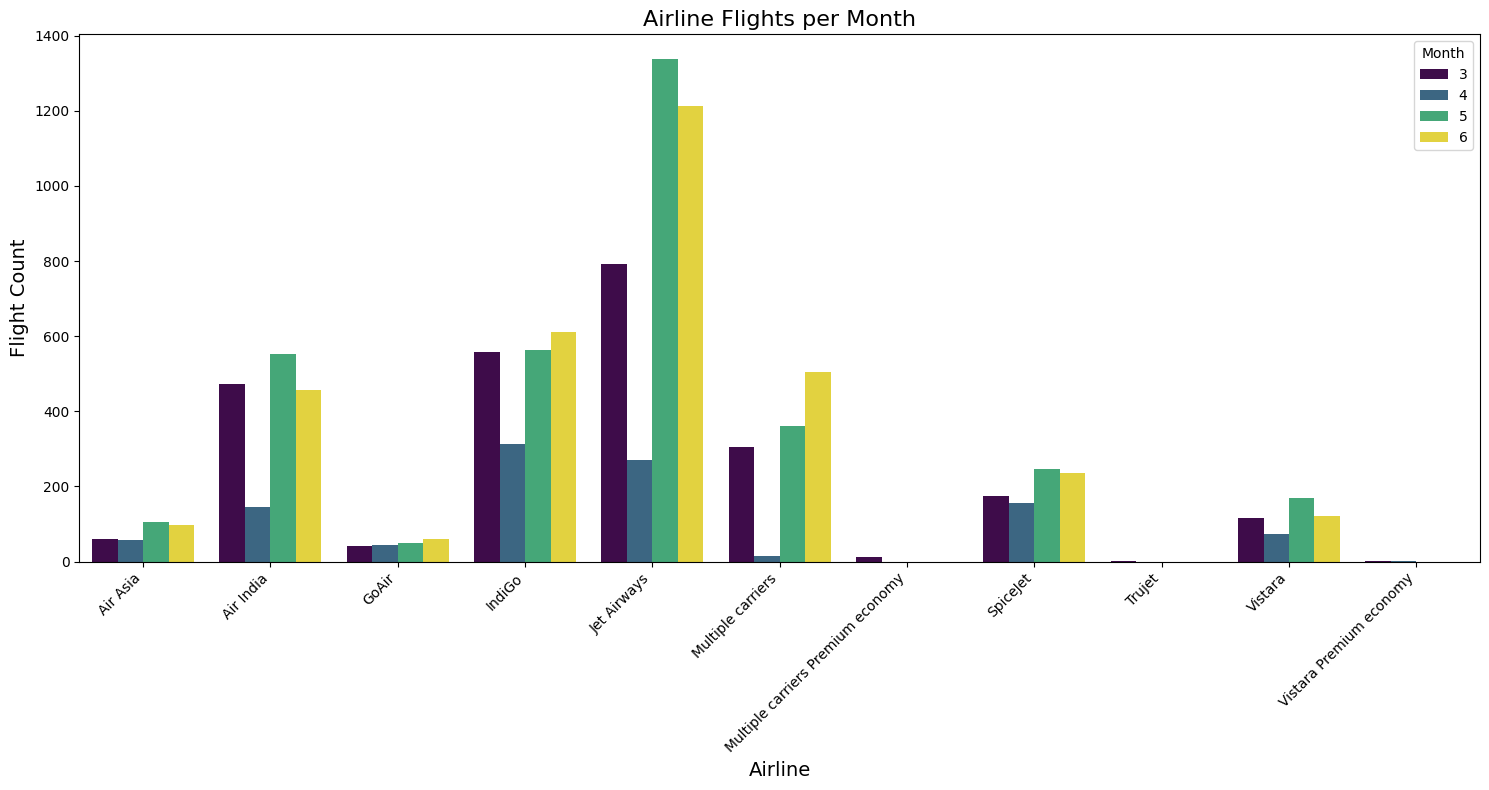

In [437]:
flight_data = df.groupby(['Airline', 'Journey_Month']).size().reset_index(name='Flight_Count')

plt.figure(figsize=(15, 8))
sns.barplot(
    x='Airline',
    y='Flight_Count',
    hue='Journey_Month',
    data=flight_data,
    palette='viridis'
)

plt.title('Airline Flights per Month', fontsize=16)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Flight Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Month')
plt.tight_layout()
plt.show()

In [438]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minute,Journey_Day,Journey_Month,Arrival_Day,Arrival_Month
0,IndiGo,Banglore,New Delhi,170,0.0,No info,3897,22,20,24,3,25,3
1,Air India,Kolkata,Banglore,445,2.0,No info,7662,5,50,1,5,1,5
2,Jet Airways,Delhi,Cochin,1140,2.0,No info,13882,9,25,9,6,10,6
3,IndiGo,Kolkata,Banglore,325,1.0,No info,6218,18,5,12,5,12,5
4,IndiGo,Banglore,New Delhi,285,1.0,No info,13302,16,50,1,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,150,0.0,No info,4107,19,55,9,4,9,4
10679,Air India,Kolkata,Banglore,155,0.0,No info,4145,20,45,27,4,27,4
10680,Jet Airways,Banglore,Delhi,180,0.0,No info,7229,8,20,27,4,27,4
10681,Vistara,Banglore,New Delhi,160,0.0,No info,12648,11,30,1,3,1,3


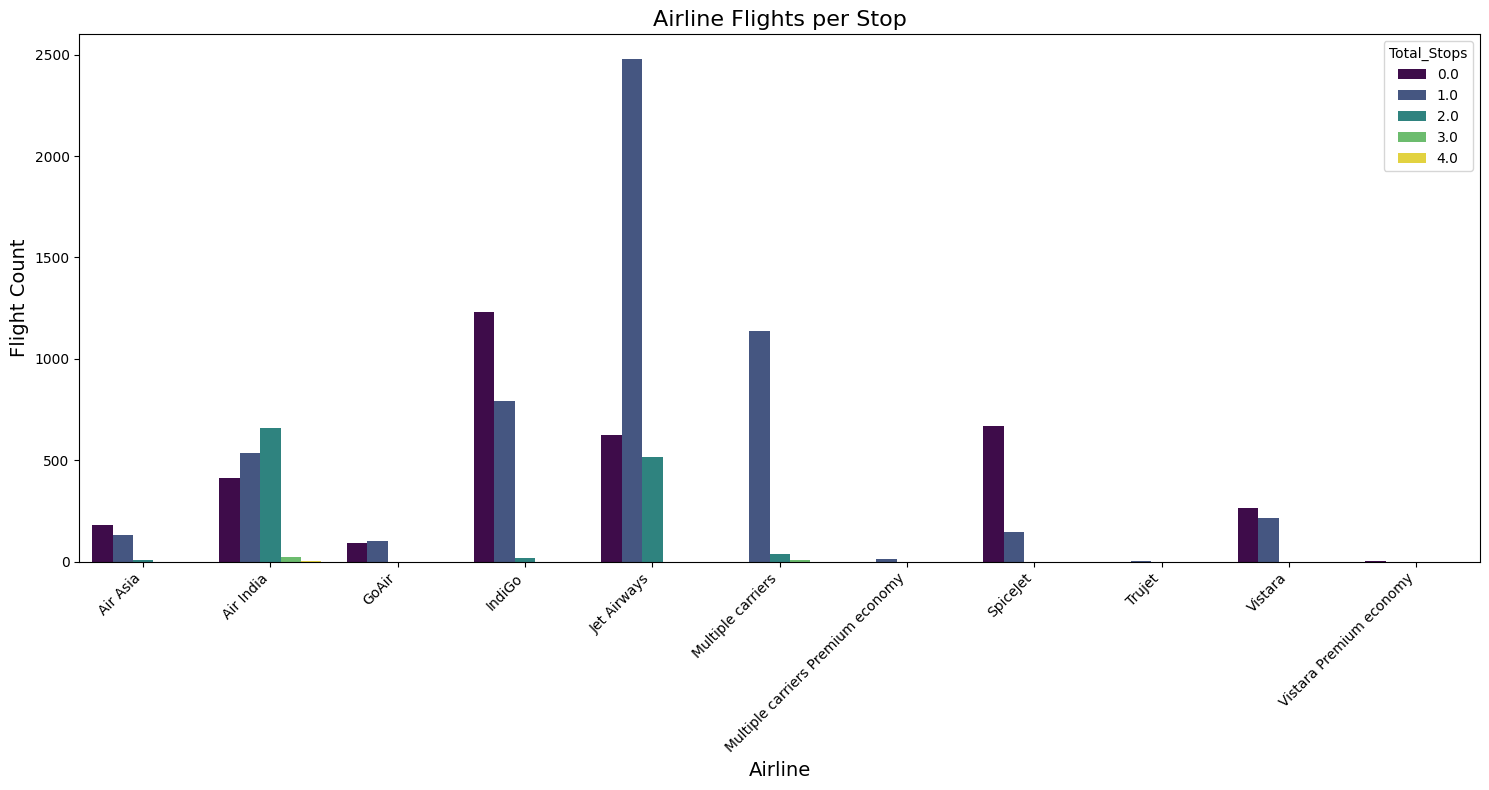

In [439]:
flight_data = df.groupby(['Airline', 'Total_Stops']).size().reset_index(name='Flight_Count')

plt.figure(figsize=(15, 8))
sns.barplot(
    x='Airline',
    y='Flight_Count',
    hue='Total_Stops',
    data=flight_data,
    palette='viridis'
)

plt.title('Airline Flights per Stop', fontsize=16)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Flight Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Total_Stops')
plt.tight_layout()
plt.show()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23036\466558083.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '1'),
  Text(1, 0, '3'),
  Text(2, 0, '6'),
  Text(3, 0, '9'),
  Text(4, 0, '12'),
  Text(5, 0, '15'),
  Text(6, 0, '18'),
  Text(7, 0, '21'),
  Text(8, 0, '24'),
  Text(9, 0, '27')])

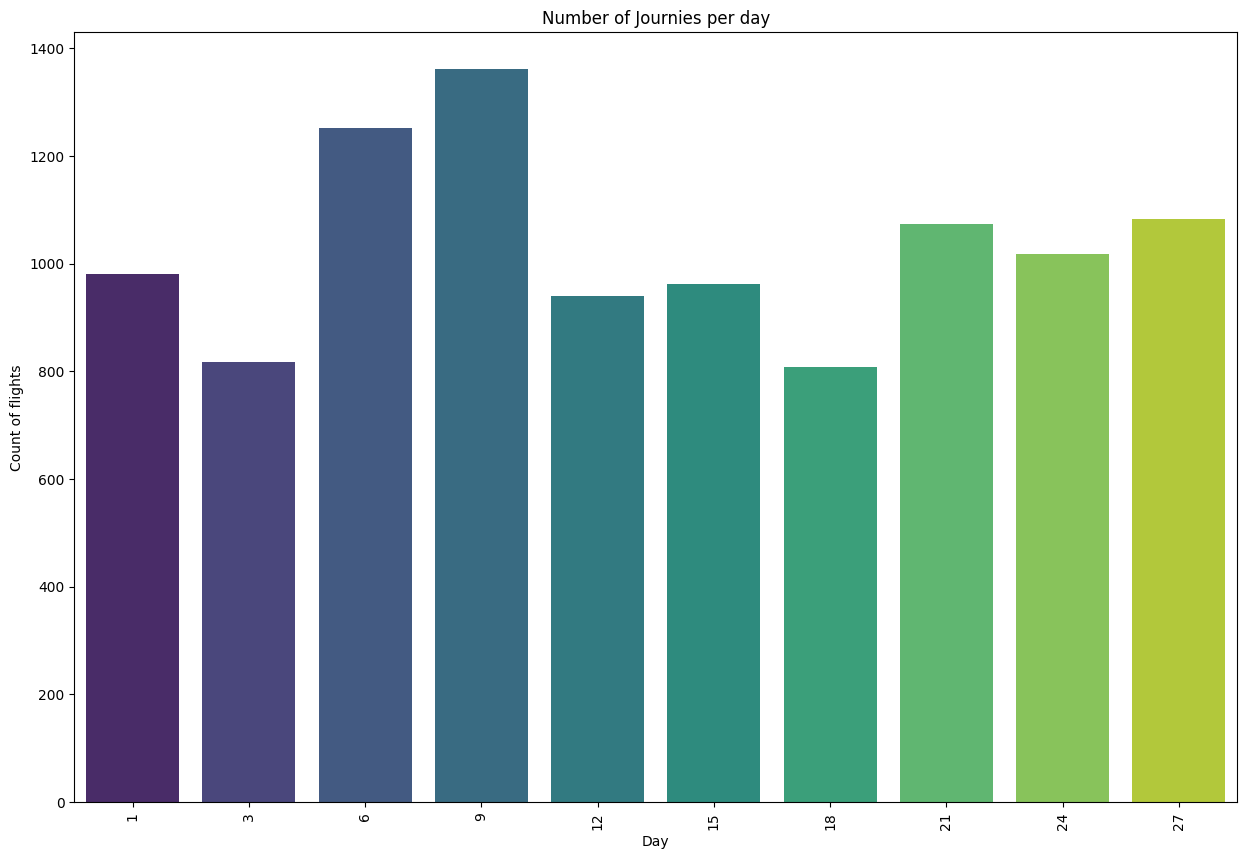

In [440]:
plt.figure(figsize = (15, 10))
plt.title('Number of Journies per day')
ax=sns.countplot(x = 'Journey_Day', data =df ,palette="viridis")
plt.xlabel('Day')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)

([0, 1, 2, 3],
 [Text(0, 0, '3'), Text(1, 0, '4'), Text(2, 0, '5'), Text(3, 0, '6')])

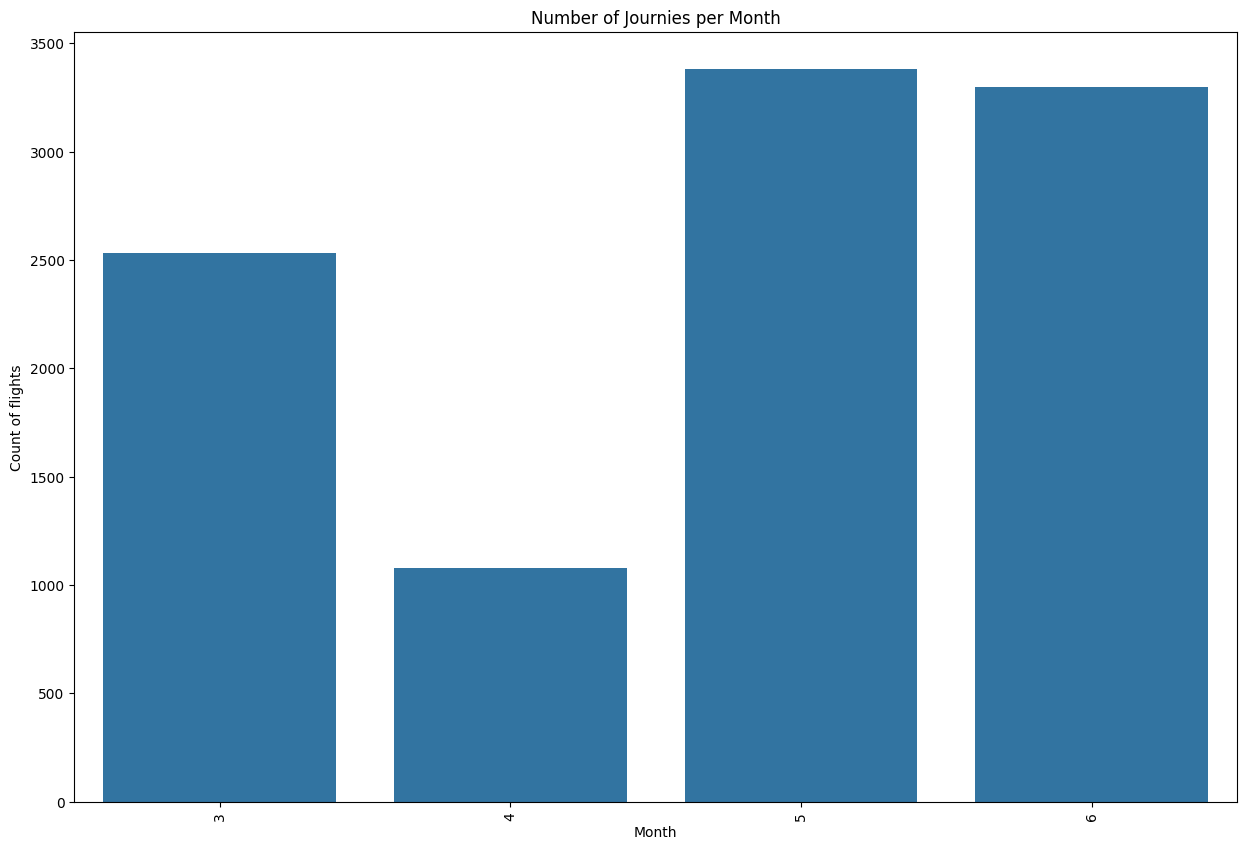

In [441]:
plt.figure(figsize = (15, 10))
plt.title('Number of Journies per Month')
ax=sns.countplot(x = 'Journey_Month', data =df)
plt.xlabel('Month')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)

In [442]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minute,Journey_Day,Journey_Month,Arrival_Day,Arrival_Month
0,IndiGo,Banglore,New Delhi,170,0.0,No info,3897,22,20,24,3,25,3
1,Air India,Kolkata,Banglore,445,2.0,No info,7662,5,50,1,5,1,5
2,Jet Airways,Delhi,Cochin,1140,2.0,No info,13882,9,25,9,6,10,6
3,IndiGo,Kolkata,Banglore,325,1.0,No info,6218,18,5,12,5,12,5
4,IndiGo,Banglore,New Delhi,285,1.0,No info,13302,16,50,1,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,150,0.0,No info,4107,19,55,9,4,9,4
10679,Air India,Kolkata,Banglore,155,0.0,No info,4145,20,45,27,4,27,4
10680,Jet Airways,Banglore,Delhi,180,0.0,No info,7229,8,20,27,4,27,4
10681,Vistara,Banglore,New Delhi,160,0.0,No info,12648,11,30,1,3,1,3


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23036\4076408749.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




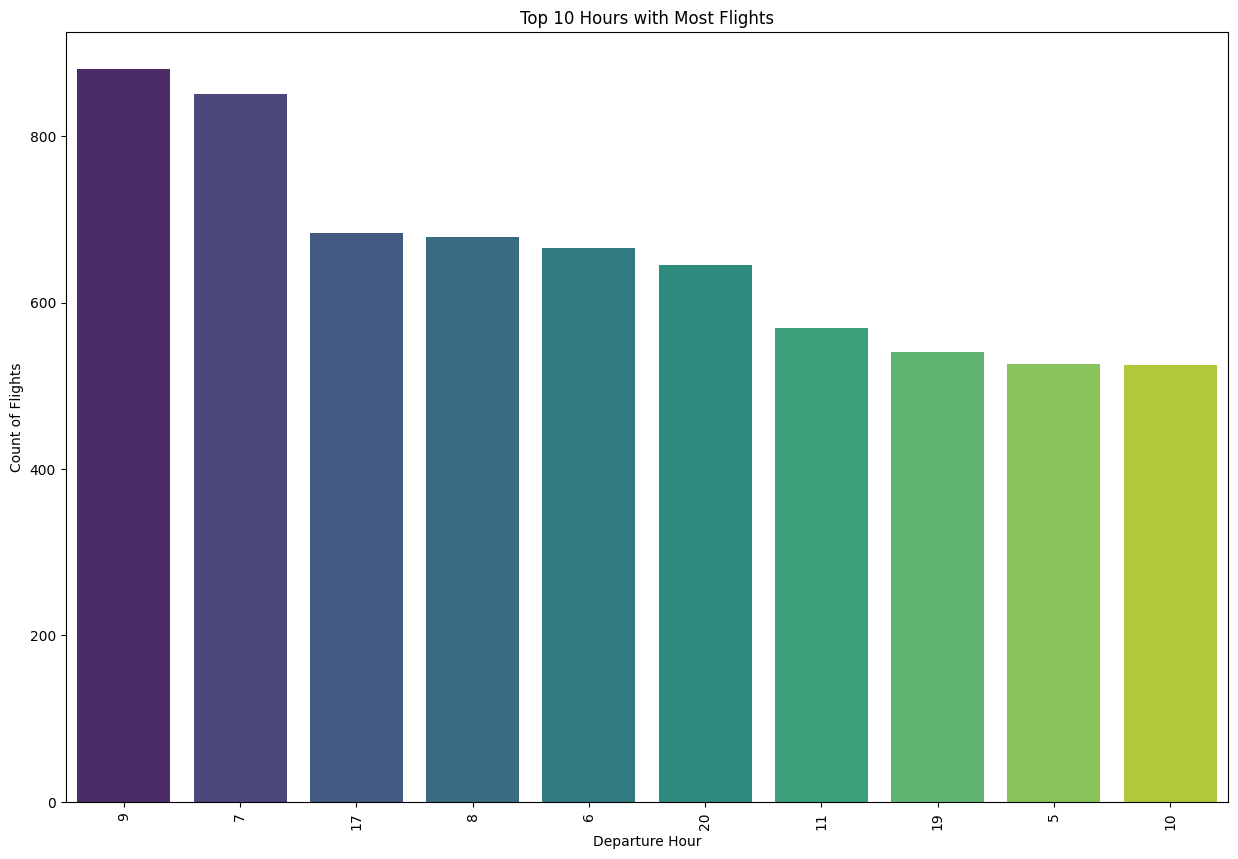

In [443]:
top_10_hours = df['Dep_Hour'].value_counts().nlargest(10).index
filtered_df = df[df['Dep_Hour'].isin(top_10_hours)]
plt.figure(figsize=(15, 10))
plt.title('Top 10 Hours with Most Flights')
ax = sns.countplot(x='Dep_Hour', data=filtered_df, order=top_10_hours ,palette="viridis")
plt.xlabel('Departure Hour')
plt.ylabel('Count of Flights')
plt.xticks(rotation=90)
plt.show()


In [444]:
avg_ticket_prices = df.groupby('Additional_Info')['Price'].mean()

avg_ticket_prices

Additional_Info
1 Long layover                  14616.555556
Change airports                 15252.166667
In-flight meal not included      9426.526590
No check-in baggage included     3642.465409
No info                          8851.418749
Red-eye flight                  10873.000000
Name: Price, dtype: float64

In [445]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8043
In-flight meal not included     1918
No check-in baggage included     318
1 Long layover                     9
Change airports                    6
Red-eye flight                     1
Name: count, dtype: int64

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23036\1590901840.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




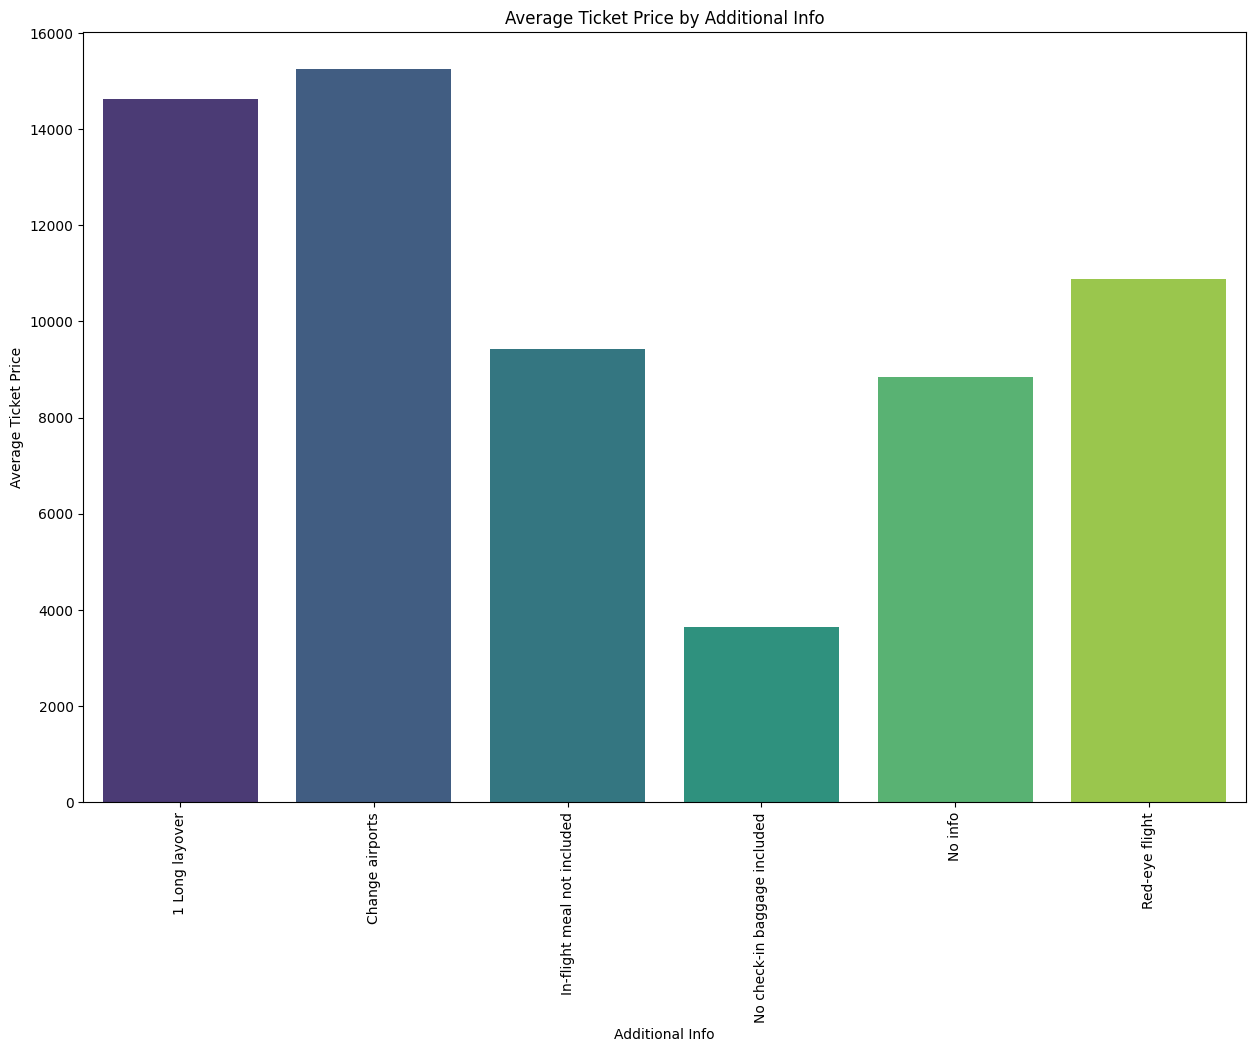

In [446]:
plt.figure(figsize=(15, 10))
plt.title('Average Ticket Price by Additional Info')
sns.barplot(x=avg_ticket_prices.index, y=avg_ticket_prices.values, palette="viridis")
plt.xlabel('Additional Info')
plt.ylabel('Average Ticket Price')
plt.xticks(rotation=90)
plt.show()

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23036\4214917233.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




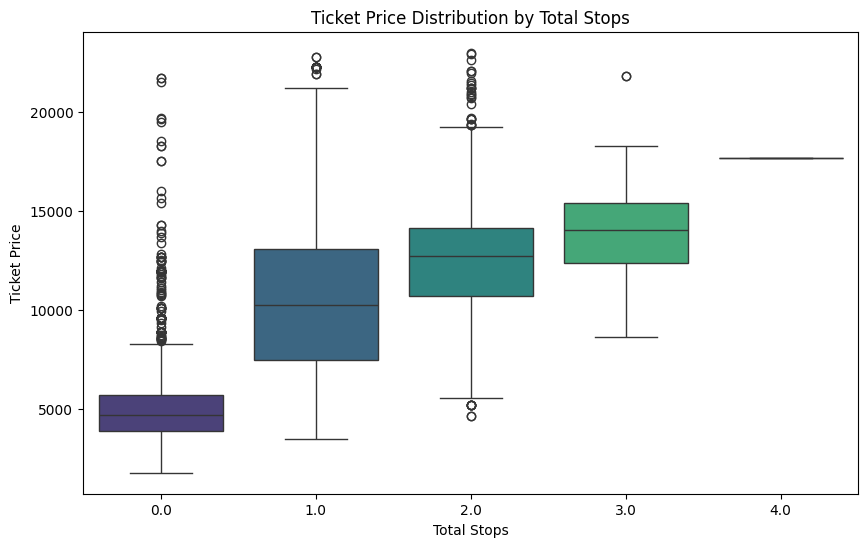

In [447]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Total_Stops',
    y='Price',
    data=df,
    palette="viridis"
)
plt.title('Ticket Price Distribution by Total Stops')
plt.xlabel('Total Stops')
plt.ylabel('Ticket Price')
plt.show()

In [448]:
avg_price_per_stops = df.groupby('Total_Stops')['Price'].mean().reset_index()

avg_price_per_stops

,Total_Stops,Price
0,0.0,4998.775922
1,1.0,10322.241081
2,2.0,12547.282609
3,3.0,14179.275862
4,4.0,17686.000000


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23036\145241700.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




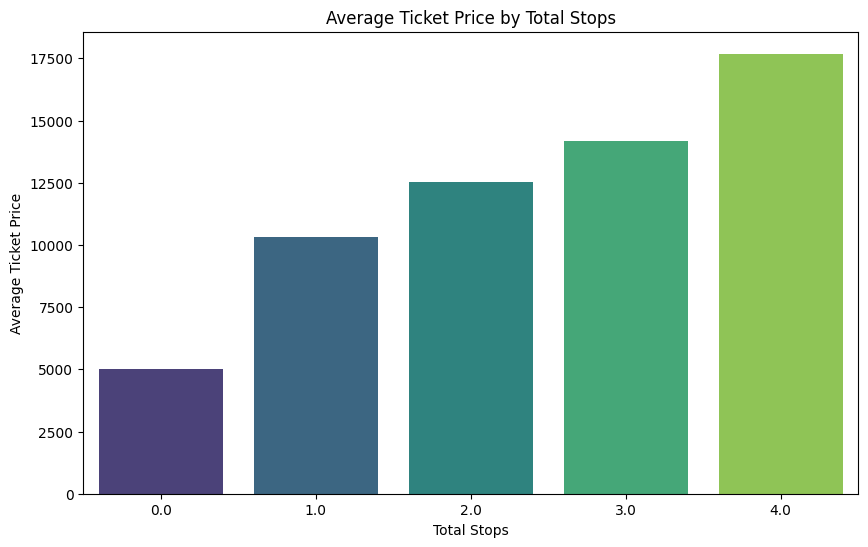

In [449]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Total_Stops',
    y='Price',
    data=avg_price_per_stops,
    palette="viridis"
)
plt.title('Average Ticket Price by Total Stops')
plt.xlabel('Total Stops')
plt.ylabel('Average Ticket Price')
plt.show()

In [450]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minute,Journey_Day,Journey_Month,Arrival_Day,Arrival_Month
0,IndiGo,Banglore,New Delhi,170,0.0,No info,3897,22,20,24,3,25,3
1,Air India,Kolkata,Banglore,445,2.0,No info,7662,5,50,1,5,1,5
2,Jet Airways,Delhi,Cochin,1140,2.0,No info,13882,9,25,9,6,10,6
3,IndiGo,Kolkata,Banglore,325,1.0,No info,6218,18,5,12,5,12,5
4,IndiGo,Banglore,New Delhi,285,1.0,No info,13302,16,50,1,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,150,0.0,No info,4107,19,55,9,4,9,4
10679,Air India,Kolkata,Banglore,155,0.0,No info,4145,20,45,27,4,27,4
10680,Jet Airways,Banglore,Delhi,180,0.0,No info,7229,8,20,27,4,27,4
10681,Vistara,Banglore,New Delhi,160,0.0,No info,12648,11,30,1,3,1,3


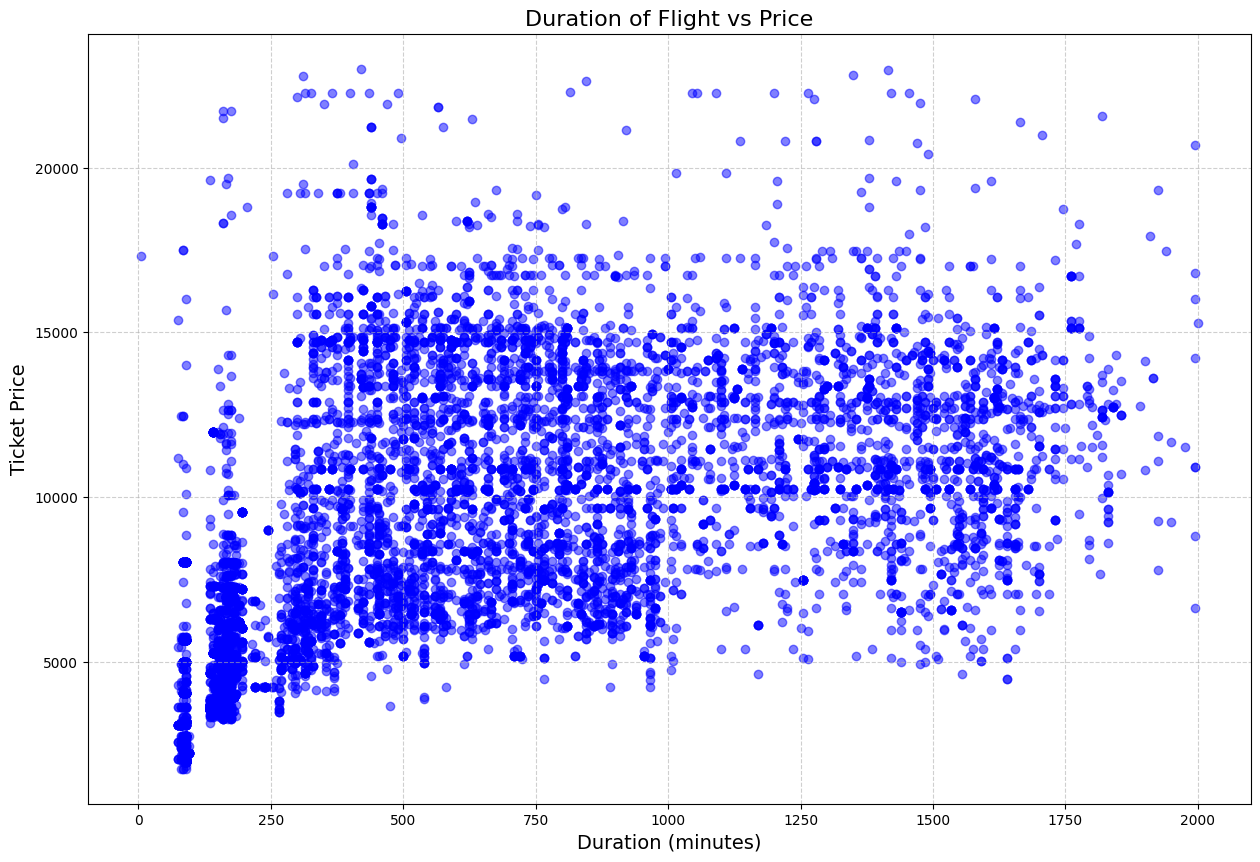

In [451]:
plt.figure(figsize=(15, 10))
plt.scatter(df['Duration'], df['Price'], alpha=0.5, color='blue')
plt.title('Duration of Flight vs Price', fontsize=16)
plt.xlabel('Duration (minutes)', fontsize=14)
plt.ylabel('Ticket Price', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Multiple carriers Premium economy'),
  Text(10, 0, 'Trujet')])

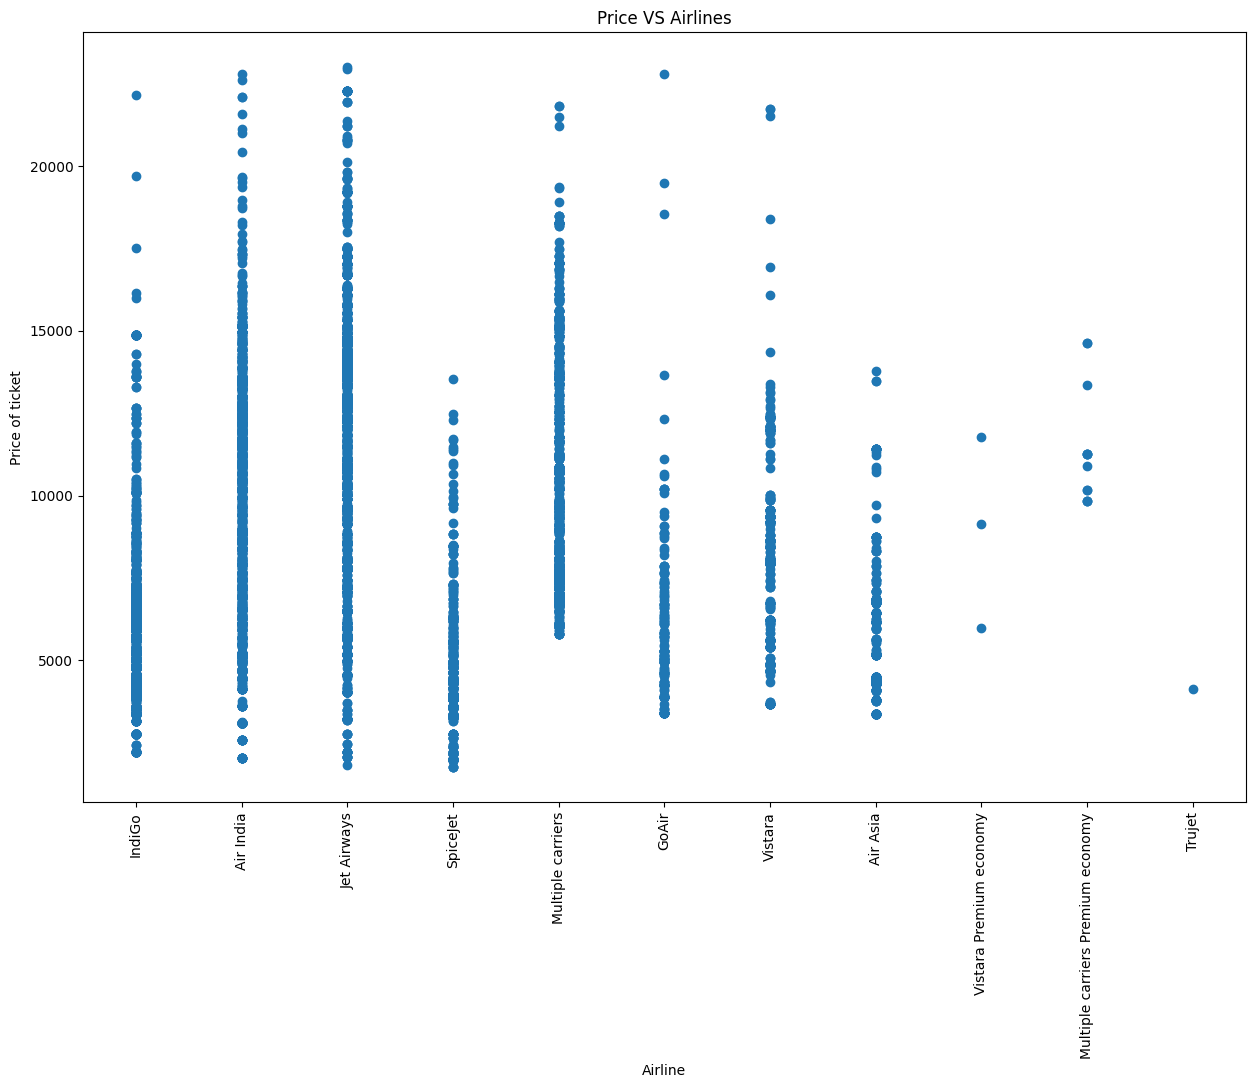

In [452]:
plt.figure(figsize = (15, 10))
plt.title('Price VS Airlines')
plt.scatter(df['Airline'], df['Price'])
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

In [453]:
px.histogram(data_frame=df , x = "Source" )

In [454]:
df['Source'].value_counts()

Source
Delhi       4272
Kolkata     2853
Banglore    2099
Mumbai       690
Chennai      381
Name: count, dtype: int64

In [455]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minute,Journey_Day,Journey_Month,Arrival_Day,Arrival_Month
0,IndiGo,Banglore,New Delhi,170,0.0,No info,3897,22,20,24,3,25,3
1,Air India,Kolkata,Banglore,445,2.0,No info,7662,5,50,1,5,1,5
2,Jet Airways,Delhi,Cochin,1140,2.0,No info,13882,9,25,9,6,10,6
3,IndiGo,Kolkata,Banglore,325,1.0,No info,6218,18,5,12,5,12,5
4,IndiGo,Banglore,New Delhi,285,1.0,No info,13302,16,50,1,3,1,3


In [456]:
df['Destination'].value_counts()

Destination
Cochin       4272
Banglore     2853
Delhi        1265
New Delhi     834
Hyderabad     690
Kolkata       381
Name: count, dtype: int64

In [457]:
px.histogram(data_frame=df , x = "Destination")

In [458]:
df.duplicated().sum()

2

In [459]:
df = df.drop_duplicates()


In [460]:
df.duplicated().sum()

0

In [461]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
Index: 10293 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10293 non-null  object 
 1   Source           10293 non-null  object 
 2   Destination      10293 non-null  object 
 3   Duration         10293 non-null  int64  
 4   Total_Stops      10292 non-null  float64
 5   Additional_Info  10293 non-null  object 
 6   Price            10293 non-null  int64  
 7   Dep_Hour         10293 non-null  int32  
 8   Dep_Minute       10293 non-null  int32  
 9   Journey_Day      10293 non-null  int32  
 10  Journey_Month    10293 non-null  int32  
 11  Arrival_Day      10293 non-null  int32  
 12  Arrival_Month    10293 non-null  int32  
dtypes: float64(1), int32(6), int64(2), object(4)
memory usage: 884.6+ KB


In [462]:
print(df.isnull().sum())


Airline            0
Source             0
Destination        0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Dep_Hour           0
Dep_Minute         0
Journey_Day        0
Journey_Month      0
Arrival_Day        0
Arrival_Month      0
dtype: int64


In [463]:
df = df.dropna(subset=['Total_Stops'])

In [464]:
print(df.isnull().sum())


Airline            0
Source             0
Destination        0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Dep_Hour           0
Dep_Minute         0
Journey_Day        0
Journey_Month      0
Arrival_Day        0
Arrival_Month      0
dtype: int64


In [465]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minute,Journey_Day,Journey_Month,Arrival_Day,Arrival_Month
0,IndiGo,Banglore,New Delhi,170,0.0,No info,3897,22,20,24,3,25,3
1,Air India,Kolkata,Banglore,445,2.0,No info,7662,5,50,1,5,1,5
2,Jet Airways,Delhi,Cochin,1140,2.0,No info,13882,9,25,9,6,10,6
3,IndiGo,Kolkata,Banglore,325,1.0,No info,6218,18,5,12,5,12,5
4,IndiGo,Banglore,New Delhi,285,1.0,No info,13302,16,50,1,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,150,0.0,No info,4107,19,55,9,4,9,4
10679,Air India,Kolkata,Banglore,155,0.0,No info,4145,20,45,27,4,27,4
10680,Jet Airways,Banglore,Delhi,180,0.0,No info,7229,8,20,27,4,27,4
10681,Vistara,Banglore,New Delhi,160,0.0,No info,12648,11,30,1,3,1,3


In [466]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minute,Journey_Day,Journey_Month,Arrival_Day,Arrival_Month
0,IndiGo,Banglore,New Delhi,170,0.0,No info,3897,22,20,24,3,25,3
1,Air India,Kolkata,Banglore,445,2.0,No info,7662,5,50,1,5,1,5
2,Jet Airways,Delhi,Cochin,1140,2.0,No info,13882,9,25,9,6,10,6
3,IndiGo,Kolkata,Banglore,325,1.0,No info,6218,18,5,12,5,12,5
4,IndiGo,Banglore,New Delhi,285,1.0,No info,13302,16,50,1,3,1,3


In [467]:
#df.drop(columns=['Arrival_Hour', 'Arrival_Minute'], inplace=True)

In [468]:
df

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Dep_Hour,Dep_Minute,Journey_Day,Journey_Month,Arrival_Day,Arrival_Month
0,IndiGo,Banglore,New Delhi,170,0.0,No info,3897,22,20,24,3,25,3
1,Air India,Kolkata,Banglore,445,2.0,No info,7662,5,50,1,5,1,5
2,Jet Airways,Delhi,Cochin,1140,2.0,No info,13882,9,25,9,6,10,6
3,IndiGo,Kolkata,Banglore,325,1.0,No info,6218,18,5,12,5,12,5
4,IndiGo,Banglore,New Delhi,285,1.0,No info,13302,16,50,1,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,150,0.0,No info,4107,19,55,9,4,9,4
10679,Air India,Kolkata,Banglore,155,0.0,No info,4145,20,45,27,4,27,4
10680,Jet Airways,Banglore,Delhi,180,0.0,No info,7229,8,20,27,4,27,4
10681,Vistara,Banglore,New Delhi,160,0.0,No info,12648,11,30,1,3,1,3


In [469]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , StandardScaler , LabelEncoder  ,MinMaxScaler,PolynomialFeatures
from sklearn.impute import SimpleImputer , KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LinearRegression, Ridge, Lasso,SGDRegressor ,ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [470]:
x = df.drop("Price" , axis = 1 )
y = df["Price"]

In [471]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10292 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10292 non-null  object 
 1   Source           10292 non-null  object 
 2   Destination      10292 non-null  object 
 3   Duration         10292 non-null  int64  
 4   Total_Stops      10292 non-null  float64
 5   Additional_Info  10292 non-null  object 
 6   Dep_Hour         10292 non-null  int32  
 7   Dep_Minute       10292 non-null  int32  
 8   Journey_Day      10292 non-null  int32  
 9   Journey_Month    10292 non-null  int32  
 10  Arrival_Day      10292 non-null  int32  
 11  Arrival_Month    10292 non-null  int32  
dtypes: float64(1), int32(6), int64(1), object(4)
memory usage: 804.1+ KB


In [472]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Dep_Hour', 'Dep_Minute', 'Journey_Day',
       'Journey_Month', 'Arrival_Day', 'Arrival_Month'],
      dtype='object')

In [473]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True, random_state=102)

print('X_train.shape \t', X_train.shape)
print('y_train.shape \t', y_train.shape)
print('***'*20)
print('X_test.shape \t', X_test.shape)
print('y_test.shape \t', y_test.shape)

X_train.shape 	 (7719, 12)
y_train.shape 	 (7719,)
************************************************************
X_test.shape 	 (2573, 12)
y_test.shape 	 (2573,)


In [474]:
Num_Columns = x.select_dtypes(include="number")
Cat_Columns = x.select_dtypes(include="object_")

In [475]:
Num_Columns.head()

,Duration,Total_Stops,Dep_Hour,Dep_Minute,Journey_Day,Journey_Month,Arrival_Day,Arrival_Month
0,170,0.0,22,20,24,3,25,3
1,445,2.0,5,50,1,5,1,5
2,1140,2.0,9,25,9,6,10,6
3,325,1.0,18,5,12,5,12,5
4,285,1.0,16,50,1,3,1,3


In [476]:
Cat_Columns.head()

,Airline,Source,Destination,Additional_Info
0,IndiGo,Banglore,New Delhi,No info
1,Air India,Kolkata,Banglore,No info
2,Jet Airways,Delhi,Cochin,No info
3,IndiGo,Kolkata,Banglore,No info
4,IndiGo,Banglore,New Delhi,No info


In [477]:
Num_Columns.isnull().sum()

Duration         0
Total_Stops      0
Dep_Hour         0
Dep_Minute       0
Journey_Day      0
Journey_Month    0
Arrival_Day      0
Arrival_Month    0
dtype: int64

In [478]:
Cat_Columns.isnull().sum()

Airline            0
Source             0
Destination        0
Additional_Info    0
dtype: int64

In [479]:
Num_Steps = list()
#Num_Steps.append(("Poly", PolynomialFeatures(degree=4, include_bias=False)))
Num_Steps.append(("Scaler", StandardScaler()))
Num_Pipeline = Pipeline(steps=Num_Steps)

In [480]:
Cat_Steps = list()
Cat_Steps.append(("Cat_Encoder", OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')))
Cat_Pipeline = Pipeline(steps=Cat_Steps)


In [481]:
Transformer = ColumnTransformer(
    transformers=[
        ('Num', Num_Pipeline, Num_Columns.columns), 
        ('Cat', Cat_Pipeline, Cat_Columns.columns)   
    ], 
    remainder='passthrough' 
)

In [482]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define the parameter grid for SGDRegressor
param_grid = {
    "Model__alpha": [0.0001, 0.001, 0.01],
    "Model__eta0": [0.0001, 0.001, 0.01],
    "Model__learning_rate": ['constant'],
    "Model__max_iter": [1000],
    "Model__tol": [1e-3, 1e-4, 1e-5],
    "Model__penalty": ['elasticnet'],  # Set penalty to elasticnet
    "Model__l1_ratio": [0.15, 0.5, 0.85],  # Add l1_ratio values
    "Model__random_state": [42],  # Fix random_state for reproducibility
}

# Create pipeline
steps = [
    ("Preprocessing", Transformer),  # Replace Transformer with your preprocessing steps
    ("Model", SGDRegressor(random_state=42))
]
pipeline = Pipeline(steps=steps)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Minimize MSE
    verbose=3,  # Detailed output
    n_jobs=-1  # Use all processors
)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and corresponding RMSE
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)

print("Best Parameters:", best_params)
print("Best RMSE (CV):", best_rmse)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test RMSE:", rmse_test)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'Model__alpha': 0.0001, 'Model__eta0': 0.0001, 'Model__l1_ratio': 0.85, 'Model__learning_rate': 'constant', 'Model__max_iter': 1000, 'Model__penalty': 'elasticnet', 'Model__random_state': 42, 'Model__tol': 0.001}
Best RMSE (CV): 2230.0102154282845
Test RMSE: 2152.578733466504


c:\Users\paula\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros



In [483]:
Num_Steps = list()
Num_Steps.append(("Poly", PolynomialFeatures(degree=4, include_bias=False)))
Num_Steps.append(("Scaler", StandardScaler()))
Num_Pipeline = Pipeline(steps=Num_Steps)

In [484]:
Transformer = ColumnTransformer(
    transformers=[
        ('Num', Num_Pipeline, Num_Columns.columns), 
        ('Cat', Cat_Pipeline, Cat_Columns.columns)   
    ], 
    remainder='passthrough' 
)

In [485]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define the parameter grid for SGDRegressor
param_grid = {
    "Model__alpha": [0.0001, 0.001, 0.01, 0.1],
    "Model__eta0": [0.0001, 0.001, 0.01],
    "Model__learning_rate": ['constant'],
    "Model__max_iter": [1000],
    "Model__tol": [1e-3, 1e-4, 1e-5],
    "Model__penalty": ['elasticnet'],  # Set penalty to elasticnet
    "Model__l1_ratio": [0.15, 0.5, 0.85],  # Add l1_ratio values
    "Model__random_state": [42],  # Fix random_state for reproducibility
}

# Create pipeline
steps = [
    ("Preprocessing", Transformer),  # Replace Transformer with your preprocessing steps
    ("Model", SGDRegressor(random_state=42))
]
pipeline = Pipeline(steps=steps)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Minimize MSE
    verbose=3,  # Detailed output
    n_jobs=-1  # Use all processors
)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and corresponding RMSE
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)

print("Best Parameters:", best_params)
print("Best RMSE (CV):", best_rmse)

# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test RMSE:", rmse_test)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


Best Parameters: {'Model__alpha': 0.0001, 'Model__eta0': 0.0001, 'Model__l1_ratio': 0.85, 'Model__learning_rate': 'constant', 'Model__max_iter': 1000, 'Model__penalty': 'elasticnet', 'Model__random_state': 42, 'Model__tol': 0.001}
Best RMSE (CV): 2073.4923681398227
Test RMSE: 1987.3244222495357


c:\Users\paula\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning:

Found unknown categories in columns [0, 3] during transform. These unknown categories will be encoded as all zeros

